# Initial relations for M_n

In [6]:
import numpy as np
from scipy.special import ellipe,ellipk
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.pyplot as pl
%matplotlib notebook
epsabs = 1e-12
epsrel = 1e-12

Here is the expression for the integral M_n:

In [12]:
def M_n(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        return 0
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Another function evaluates this integral with a series expansion:

In [16]:
def M_series(r,b,n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        alpha = np.sqrt(1-(b-r)**2)**n*np.sqrt(k2*np.pi)*gamma(1+0.5*n)/gamma(1.5+0.5*n)
        k2n = 1
        Mn = alpha
        for j in range(1,n):
            k2n *= k2
            alpha *= (2*j-1)**2/(2*j*(1+n+2*j))
            Mn += alpha*k2n
        return Mn
    elif b <= 1 - r:
        return 0
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

<IPython.core.display.Javascript object>


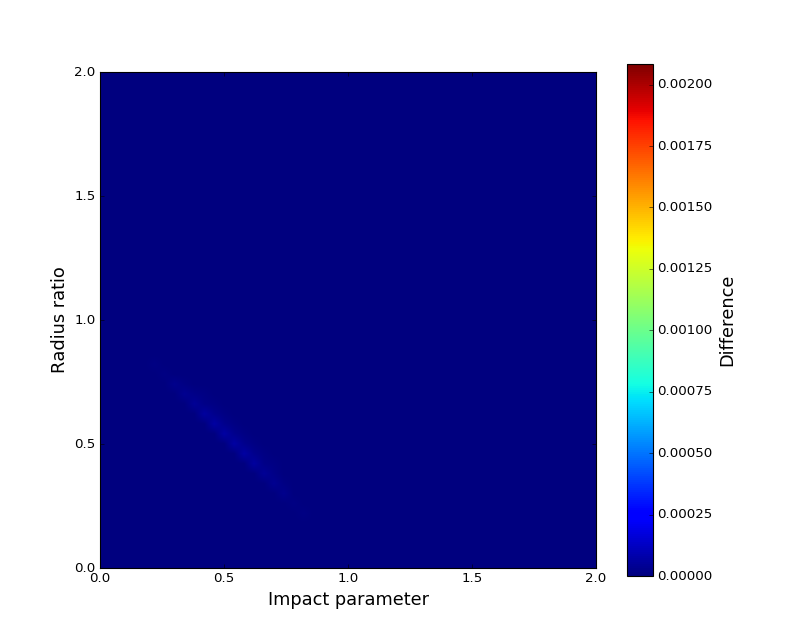

<IPython.core.display.Javascript object>


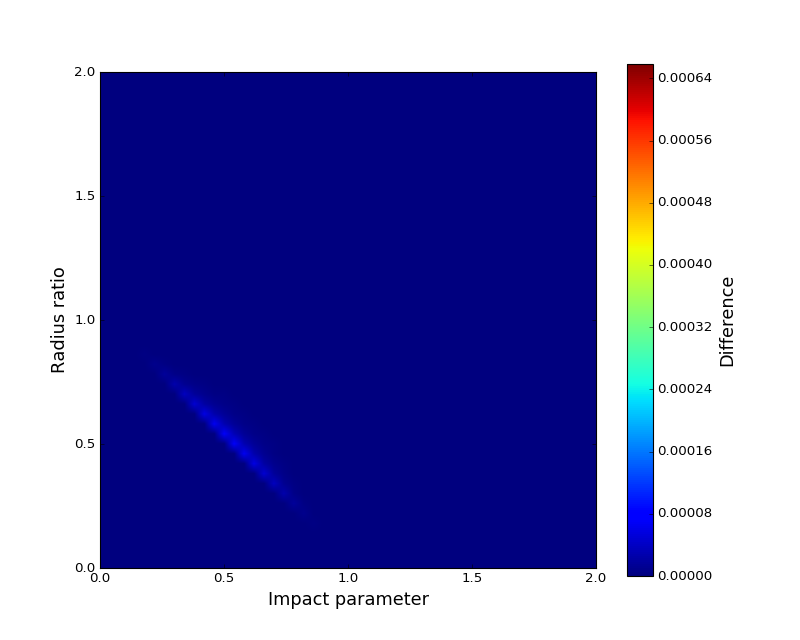

<IPython.core.display.Javascript object>


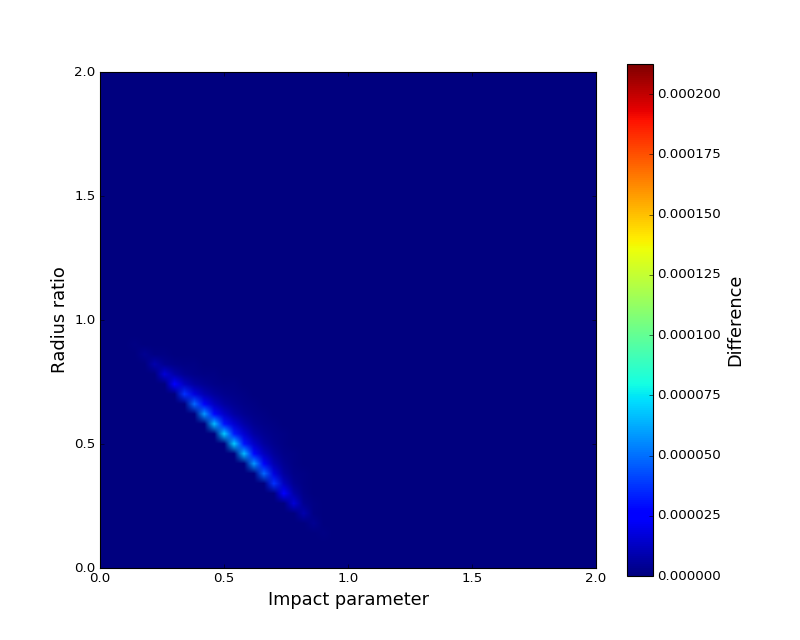

<IPython.core.display.Javascript object>


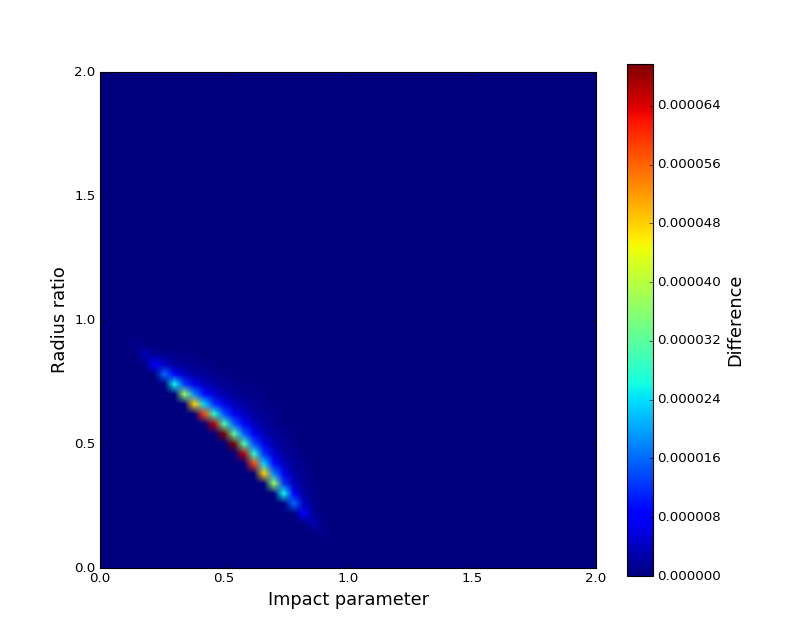

In [17]:
n = 50
barr = np.linspace(1e-4, 2, n)
rarr = np.linspace(1e-4, 2, n)
diff = np.zeros((n, n))
Nu_grid = [5,6,7,8]
# Nu is the order of the integral:
for k, Nu in enumerate(Nu_grid):
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            diff[j, i] = abs(M_n(r, b, Nu) - M_series(r, b, Nu))
    fig = pl.figure(figsize=(10, 8))
    pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
    pl.xlabel("Impact parameter", fontsize=16)
    pl.ylabel("Radius ratio", fontsize=16)
    cb = pl.colorbar()
    cb.ax.set_ylabel("Difference", fontsize=16);

The difference is numerically precise everywhere, indicating that our expression is correct.